In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16,12]
plt.rcParams.update({'font.size' : 18})

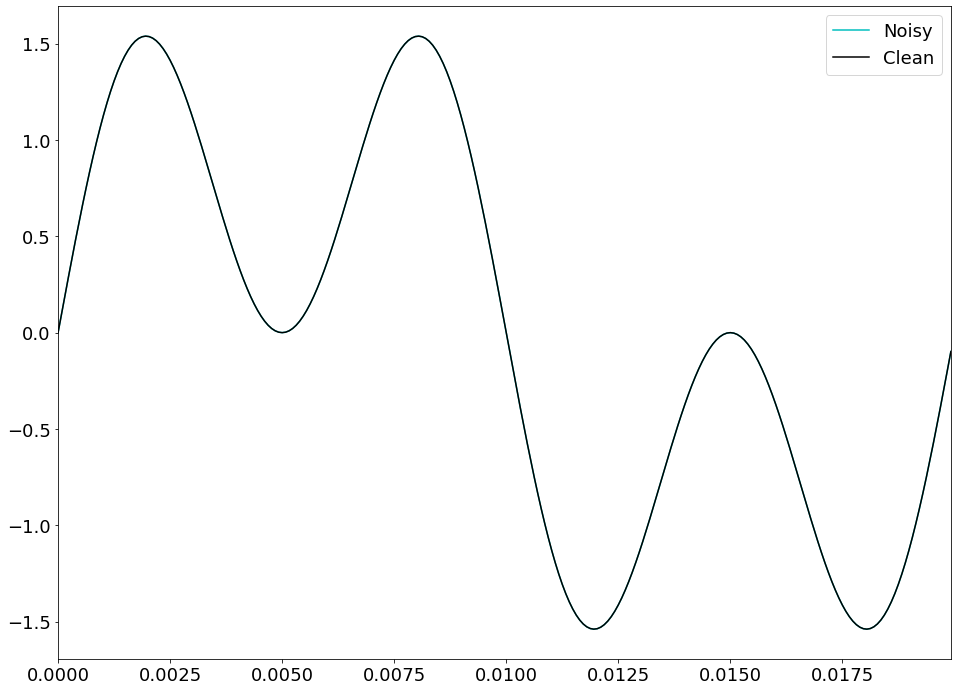

In [5]:
# Creating signal with multiple frequencies

dt = 0.000078125
t = np.arange(0,0.02,dt)

f = np.sin(2*np.pi*50*t) + np.sin((2*np.pi*150*t)) # Sum of two signals
f_clean = f
#f = f + 3*np.random.randn(len(t))

plt.plot(t,f,color='c', label='Noisy')
plt.plot(t,f_clean,color='k', label='Clean')
plt.xlim(t[0],t[-1])
plt.legend()

<ipython-input-7-246930078fa6>:12: ComplexWarning: Casting complex values to real discards the imaginary part
  phase[i] = np.arctan(fhat[i+1]/fhat[i])
C:\Users\123\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\123\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


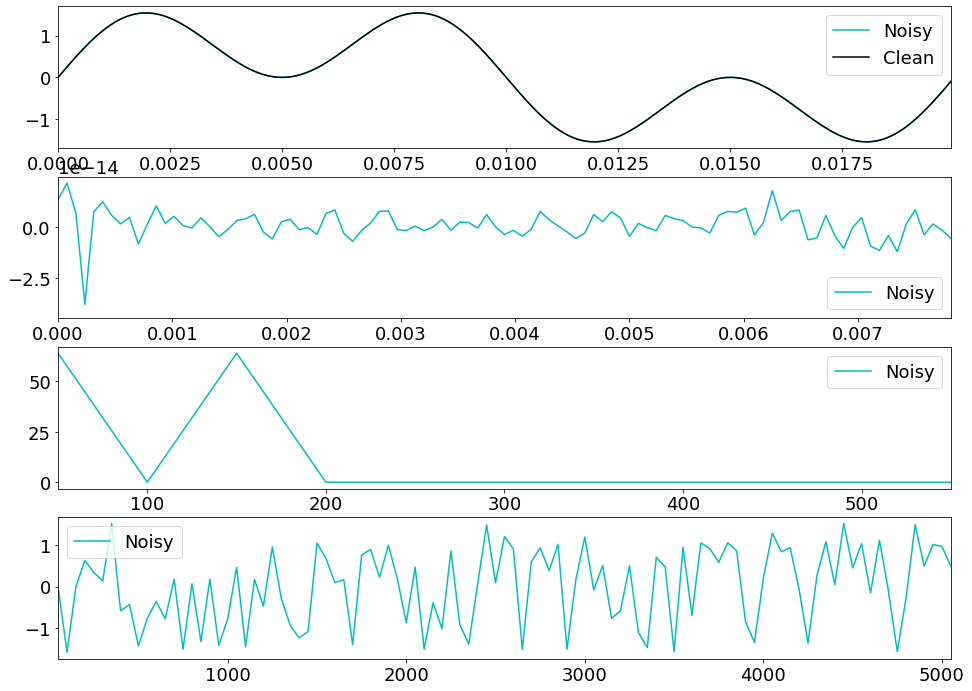

In [7]:
# Compute the FFT

n = len(t)
fhat = np.fft.fft(f,n)
PSD = fhat * np.conj(fhat) / n
freq = (1/(dt*n)) * np.arange(n)
L = np.arange(1, np.floor(n/2), dtype='int')

phase = np.zeros(n)

for i in range(n-1):
    phase[i] = np.arctan(fhat[i+1]/fhat[i])
    i = i+2

fig,axs = plt.subplots(4,1)

plt.sca(axs[0])
plt.plot(t,f,color='c', label='Noisy')
plt.plot(t,f_clean,color='k', label='Clean')

plt.xlim(t[0],t[-1])
plt.legend()

plt.sca(axs[1])
plt.plot(t,fhat,color='c', label='Noisy')
plt.xlim(t[0],t[100])
plt.legend()

plt.sca(axs[2])
plt.plot(freq[L],PSD[L],color='c', label='Noisy')
plt.xlim(freq[L[0]],freq[L[10]])
plt.legend()

plt.sca(axs[3])
plt.plot(freq[L],phase[L],color='c', label='Noisy')
plt.xlim(freq[L[0]],freq[L[100]])
plt.legend()


plt.show()

In [8]:
# Use the PSD to filter out the noise
indices = PSD > 10
PSDClean = PSD * indices
fhat_filt = indices * fhat
ffilt = np.fft.ifft(fhat_filt)


C:\Users\123\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\123\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\123\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\123\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


256
255.99999999999994
(63.999999999999986+0j)
-1.542522184176707e-16
(64+0j)
1.208428639589628e-16
[7.30357946e-31+0.j 6.40000000e+01+0.j 1.71626851e-30+0.j
 6.40000000e+01+0.j 1.16987547e-30+0.j 7.21997678e-31+0.j
 3.56561772e-31+0.j 1.23444249e-32+0.j 6.91191892e-31+0.j
 3.46104162e-31+0.j 1.00119011e-31+0.j 7.60535470e-31+0.j
 7.08424407e-31+0.j 2.11608878e-31+0.j 2.04488428e-31+0.j
 7.21352124e-33+0.j 8.89678589e-32+0.j 2.73955455e-32+0.j
 8.55463104e-32+0.j 1.13543311e-32+0.j 3.59382749e-31+0.j
 3.45318064e-31+0.j 1.63281650e-31+0.j 4.43509139e-31+0.j
 1.26368723e-31+0.j 3.39089511e-32+0.j 6.43269778e-32+0.j
 1.23036341e-32+0.j 1.90034351e-32+0.j 7.03519071e-32+0.j
 1.84942230e-31+0.j 4.37392961e-31+0.j 3.80292943e-31+0.j
 1.92309166e-31+0.j 1.42328277e-32+0.j 3.05250188e-31+0.j
 2.84498435e-31+0.j 3.63764713e-31+0.j 9.05382720e-32+0.j
 2.12102372e-31+0.j 1.15004658e-32+0.j 1.49237360e-32+0.j
 7.68000035e-33+0.j 7.26224377e-32+0.j 1.35734827e-32+0.j
 3.10347453e-32+0.j 4.02835918

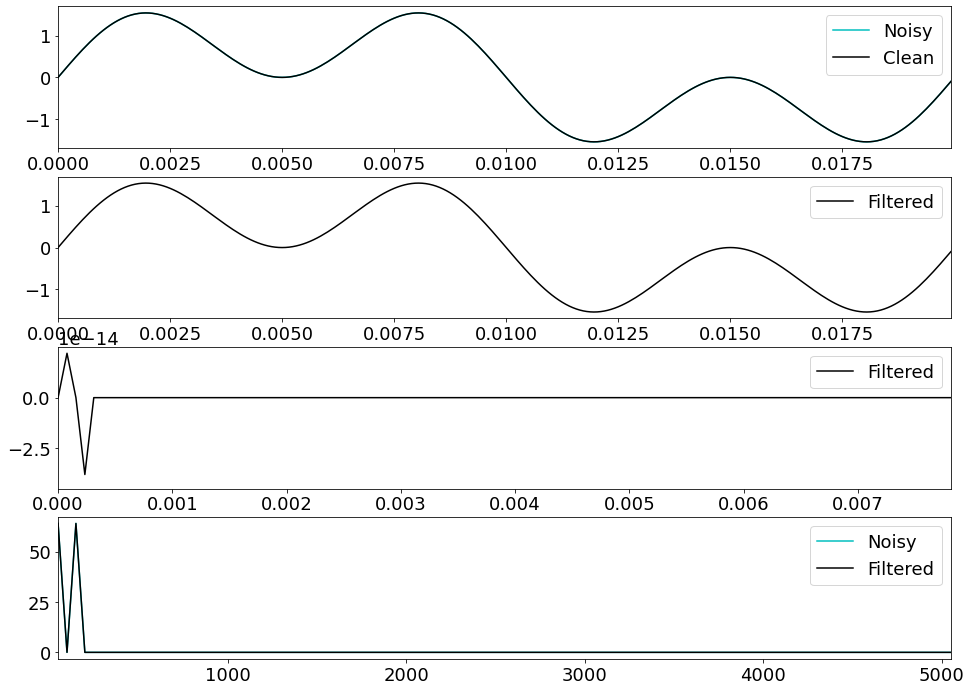

In [9]:
# plot
fig,axs = plt.subplots(4,1)

plt.sca(axs[0])
plt.plot(t,f,color='c', label='Noisy')
plt.plot(t,f_clean,color='k', label='Clean')
plt.xlim(t[0],t[-1])
plt.legend()

plt.sca(axs[1])
plt.plot(t,ffilt,color='k', label='Filtered')
plt.xlim(t[0],t[-1])
#plt.ylim(-10,10)
plt.legend()

plt.sca(axs[2])
plt.plot(t,fhat_filt,color='k', label='Filtered')
plt.xlim(t[0],t[100])
plt.legend()

plt.sca(axs[3])
plt.plot(freq[L],PSD[L],color='c', label='Noisy')
plt.plot(freq[L],PSDClean[L],color='k', label='Filtered')
plt.xlim(freq[L[0]],freq[L[100]])
plt.legend()

print(n)
power_t = 0
power_w = 0
power_filt = 0
power_psd = 0
for i in range(n):
    power_t += f[i]*f[i]
    power_w += fhat[i]*np.conj(fhat[i])
    power_filt += fhat_filt[i]*np.conj(fhat_filt[i])
    power_psd += PSD[i]

#print(min(f))
print(power_t)
print(PSD[1])
print(phase[1])
print(PSD[3])
print(phase[3])
#print(power_w/n)
#print(power_filt/(2*n))
#print(power_psd)
#print(max(PSD))
print(PSD)
print(freq)
plt.show()

-8.7
[-8.352 -8.352 -8.7   ...  7.656  7.656  7.656]


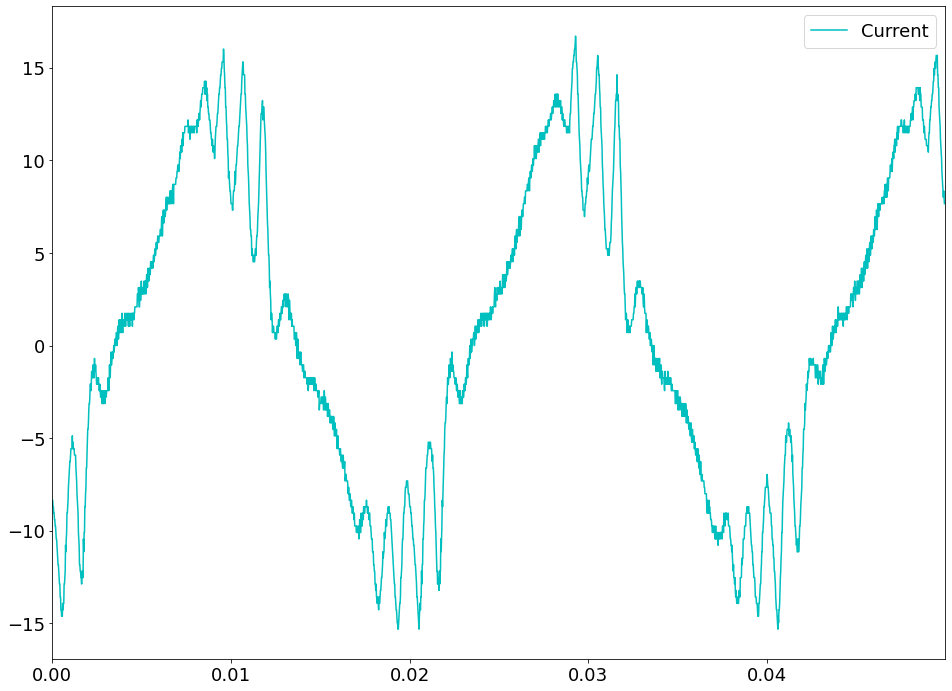

In [4]:
C = pd.read_csv("CH2_csv.csv")
c_dt = 0.000020
c_t = np.arange(0,0.04998,c_dt)

Current = np.array(C.values)
#print(f)
print(Current[3][0])

current = np.zeros(len(c_t))
for i in range(len(c_t)):
    current[i] = Current[i][0]

print(current)

plt.plot(c_t,current,color='c', label='Current')
plt.xlim(c_t[0],c_t[-1])
plt.legend()

In [5]:
c_n = len(c_t)
c_fhat = np.fft.fft(current,c_n)
c_PSD = c_fhat * np.conj(c_fhat) / c_n
c_freq = (1/(c_dt*c_n)) * np.arange(c_n)
c_L = np.arange(1, np.floor(c_n/2), dtype='int')
print(c_n)

2499


C:\Users\123\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\123\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


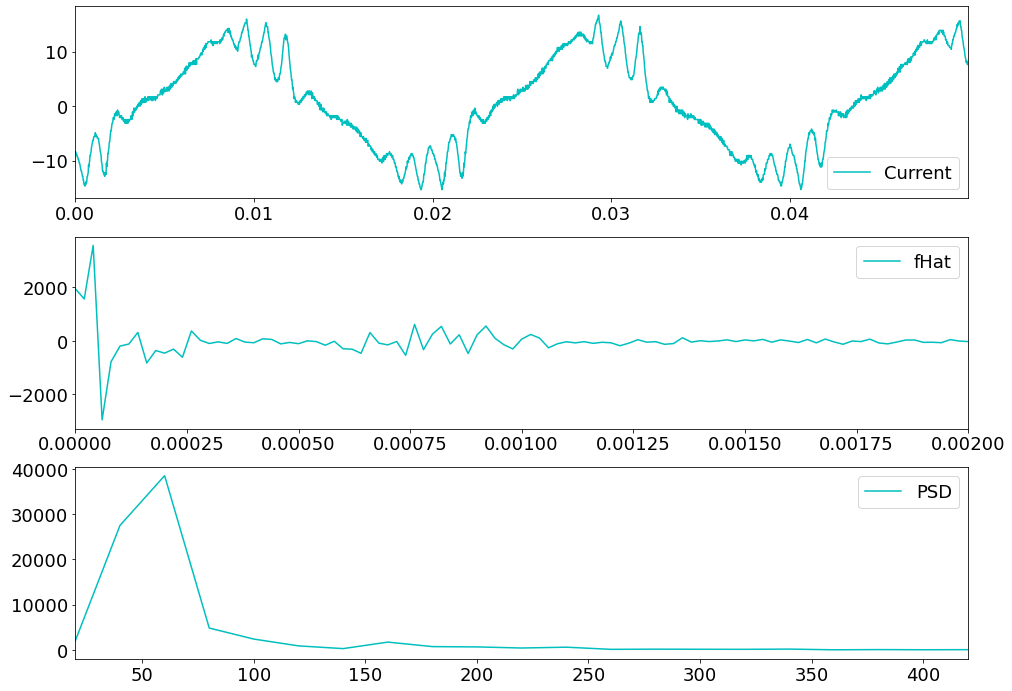

[  0.          20.0080032   40.0160064   60.0240096   80.03201281
 100.04001601 120.04801921 140.05602241 160.06402561 180.07202881
 200.08003201 220.08803521 240.09603842 260.10404162 280.11204482
 300.12004802 320.12805122 340.13605442 360.14405762 380.15206082]


In [6]:

fig,axs = plt.subplots(3,1)

plt.sca(axs[0])
plt.plot(c_t,current,color='c', label='Current')
plt.xlim(c_t[0],c_t[-1])
plt.legend()

plt.sca(axs[1])
plt.plot(c_t,c_fhat,color='c', label='fHat')
plt.xlim(c_t[0],c_t[100])
plt.legend()

plt.sca(axs[2])
plt.plot(c_freq[c_L],c_PSD[c_L],color='c', label='PSD')
plt.xlim(c_freq[c_L[0]],c_freq[c_L[20]])
plt.legend()


plt.show()

print(c_freq[0:20])

In [7]:
# Use the PSD to filter out the noise
c_indices = c_PSD > 20000
c_PSDClean = c_PSD * c_indices
c_fhat_filt = c_indices * c_fhat
c_ffilt = np.fft.ifft(c_fhat_filt)


C:\Users\123\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\123\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\123\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\123\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


2499
0
(2064.2196970221844+0j)
(38494.95705221157+0j)
[0.00000000e+00 2.00080032e+01 4.00160064e+01 ... 4.99399760e+04
 4.99599840e+04 4.99799920e+04]
(38494.95705221157+0j)


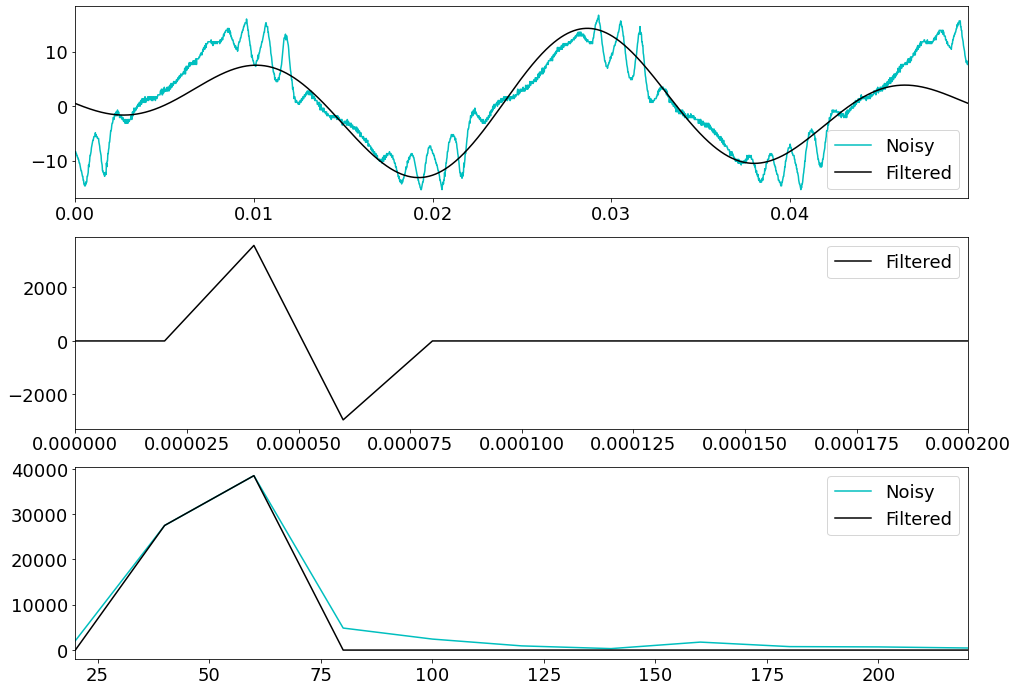

In [10]:
# plot
fig,axs = plt.subplots(3,1)

plt.sca(axs[0])
plt.plot(c_t,current,color='c', label='Noisy')
plt.plot(c_t,c_ffilt,color='k', label='Filtered')
plt.xlim(c_t[0],c_t[-1])
#plt.ylim(-10,10)
plt.legend()

plt.sca(axs[1])
plt.plot(c_t,c_fhat_filt,color='k', label='Filtered')
plt.xlim(c_t[0],c_t[10])
plt.legend()

plt.sca(axs[2])
plt.plot(c_freq[c_L],c_PSD[c_L],color='c', label='Noisy')
plt.plot(c_freq[c_L],c_PSDClean[c_L],color='k', label='Filtered')
plt.xlim(c_freq[c_L[0]],c_freq[c_L[10]])
plt.legend()

print(c_n)
power_t = 0
power_w = 0
power_filt = 0
power_psd = 0


#print(min(f))
print(power_t)
print(c_PSD[1])

print(c_PSD[3])

print(c_freq)
#print(power_filt/(2*n))
#print(power_psd)
print(max(c_PSD))
plt.show()